## N=2

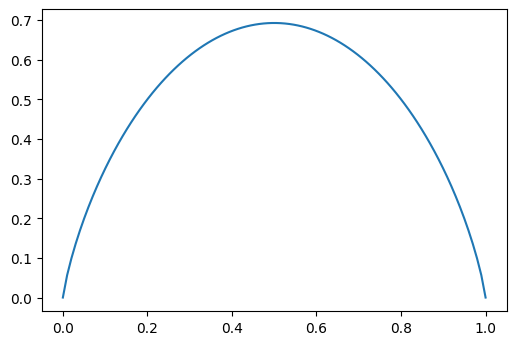

In [15]:
import numpy as np 
np.log(1/2)

x = np.linspace(0,1,100)
y = -( x*np.log(x+1e-6)+(1-x)*np.log(1-x+1e-6) )

import matplotlib.pyplot as plt
plt.figure(dpi=100)
plt.plot(x,y)
plt.show()

In [17]:
print(np.log(2), y.max())

0.6931471805599453 0.6930941644918628


## N=3

<ipython-input-53-c8e322f14900>:6: RuntimeWarning: invalid value encountered in log
  z = -( x*np.log(x+1e-6)+y*np.log(y+1e-6)+(1-x-y)*np.log(1-x-y+1e-6) )


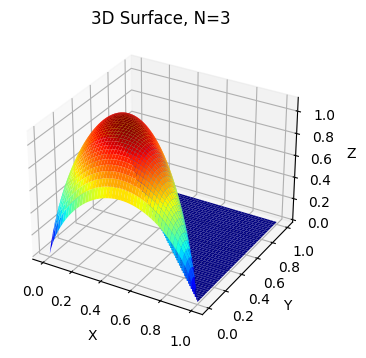

1.0986122886681098 1.0986092886726098
[0.33333333] [0.33333333] [1.09860929]


In [53]:
# 准备数据
n = 1000
x, y = np.meshgrid(np.linspace(0, 1, n),
                   np.linspace(0, 1, n))

z = -( x*np.log(x+1e-6)+y*np.log(y+1e-6)+(1-x-y)*np.log(1-x-y+1e-6) )
idx_nan = np.where(np.isnan(z))
z[idx_nan] = 0
# 绘制图片
fig = plt.figure("3D Surface", dpi=100)

# 设置为3D图片类型
ax3d = mp.gca(projection="3d")    # 同样可以实现

ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")
plt.tick_params(labelsize=10)

ax3d.plot_surface(x, y, z, cstride=20, rstride=20, cmap="jet")
plt.title("3D Surface, N=3", fontsize=12)
plt.show()

print(np.log(3), z.max())
idx_max = np.where(z==z.max())
print(x[idx_max],y[idx_max],z[idx_max])

In [64]:
def get_z(x,y):
    return -( x*np.log(x+1e-6)+y*np.log(y+1e-6)+(1-x-y)*np.log(1-x-y+1e-6) )
get_z(0.1,0.2)

0.8018155525515516

In [63]:
1.1*0.75

0.8250000000000001

## ema相关函数

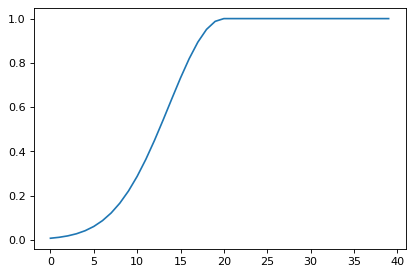

In [110]:
from utils import ramps, losses
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--ema_decay', type=float,  default=0.99, help='ema_decay')
parser.add_argument('--consistency_type', type=str,  default="mse", help='consistency_type')
parser.add_argument('--consistency', type=float,  default=1, help='consistency')
parser.add_argument('--consistency_rampup', type=float,  default=1.0, help='consistency_rampup')
args = parser.parse_args([])
def get_current_consistency_weight(epoch):
    # Consistency ramp-up from https://arxiv.org/abs/1610.02242
    return args.consistency * ramps.sigmoid_rampup(epoch, args.consistency_rampup)


max_epoch = 20
epoch_num = np.arange(0,max_epoch*2)
consistency_weight = np.array([get_current_consistency_weight(epoch/max_epoch) for epoch in epoch_num])

plt.figure(dpi=80)
plt.plot(epoch_num, consistency_weight)
plt.show()

In [94]:
from itertools import zip_longest
from itertools import chain
A=range(10)
B=range(20)
for a,b in zip_longest(A,B,fillvalue=A[2]):
    print(a,b)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19


In [92]:
help(zip_longest)

Help on class zip_longest in module itertools:

class zip_longest(builtins.object)
 |  zip_longest(iter1 [,iter2 [...]], [fillvalue=None]) --> zip_longest object
 |  
 |  Return a zip_longest object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the longest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.  When the shorter iterables
 |  are exhausted, the fillvalue is substituted in their place.  The fillvalue
 |  defaults to None or can be specified by a keyword argument.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  ------

In [108]:
dir(A)

['__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index',
 'start',
 'step',
 'stop']

In [105]:
iterA = iter(A)
iterA.__next__()

0

In [106]:
iterA.__next__()

1

In [107]:
iterA.__next__()

2